In [16]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [59]:
import pandas as pd
predic = pd.read_csv("dataset-prueba2.csv")
predic


,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0.3,8.0.1,5.0.1,4.0.4,-7.0.1,-59.0,16.0,0
0,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
1,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
2,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
3,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0
4,15.0,-5.0,-5.0,-15.0,12.0,-22.0,-38.0,36.0,9.0,6.0,...,-26.0,5.0,6.0,6.0,11.0,5.0,30.0,-48.0,25.0,0
5,-12.0,-5.0,-1.0,4.0,-16.0,-17.0,-69.0,-16.0,-12.0,-3.0,...,1.0,-36.0,-10.0,-12.0,-16.0,-12.0,-47.0,6.0,-30.0,0
6,43.0,0.0,-2.0,6.0,11.0,26.0,51.0,27.0,-9.0,-2.0,...,41.0,15.0,4.0,10.0,25.0,9.0,13.0,73.0,47.0,0
7,-26.0,-9.0,-18.0,-60.0,-23.0,-35.0,-85.0,-40.0,27.0,10.0,...,-17.0,-7.0,-1.0,2.0,10.0,-6.0,7.0,-2.0,-1.0,0
8,-34.0,3.0,9.0,29.0,6.0,-25.0,-124.0,-1.0,12.0,-6.0,...,-6.0,41.0,0.0,-10.0,-17.0,21.0,3.0,42.0,11.0,0
9,-1.0,0.0,6.0,37.0,21.0,22.0,-15.0,-36.0,-10.0,-3.0,...,-73.0,33.0,14.0,11.0,7.0,26.0,60.0,127.0,105.0,0


In [60]:
predic.isnull().sum()


26.0       0
4.0        0
5.0        0
8.0        0
-1.0       0
-13.0      0
-109.0     0
-66.0      0
-9.0       0
2.0        0
4.0.1      0
13.0       0
-18.0      0
-30.0      0
-119.0     0
-45.0      0
17.0       0
6.0        0
-1.0.1     0
-9.0.1     0
27.0       0
20.0       0
91.0       0
71.0       0
-26.0      0
-1.0.2     0
0.0        0
1.0        0
13.0.1     0
20.0.1     0
          ..
0.0.1      0
-23.0      0
-1.0.3     0
-80.0      0
4.0.2      0
-7.0       0
-6.0       0
-12.0      0
-27.0      0
-11.0      0
-16.0      0
-67.0      0
-8.0       0
-27.0.1    0
1.0.1      0
1.0.2      0
13.0.2     0
-8.0.1     0
-11.0.1    0
21.0       0
-28.0      0
61.0       0
4.0.3      0
8.0.1      0
5.0.1      0
4.0.4      0
-7.0.1     0
-59.0      0
16.0       0
0          0
Length: 65, dtype: int64

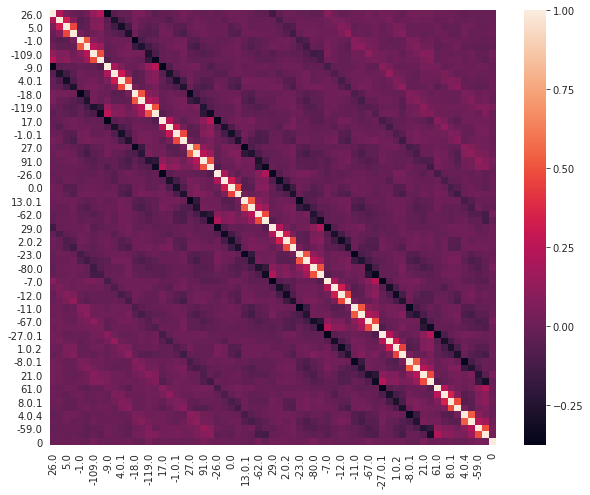

In [58]:
sb.heatmap(predic.corr())


In [20]:
X = predic.ix[:,0:63].values

In [23]:
y = predic.ix[:,64].values

In [45]:
#regrecion logistica con 0.3 de divicion del data set de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)
X_test.shape 

(2627, 63)

In [28]:
#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
#print("coeficientes del modelo: "+str(LogReg.coef_))
print("intercept: "+str(LogReg.intercept_))

intercept: [-0.90770483 -0.60057945 -0.63376195]


In [30]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 2])

In [31]:
#rendimiento
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[405, 228, 257],
       [123, 369, 364],
       [215, 302, 364]])

In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.46      0.50       890
           1       0.41      0.43      0.42       856
           2       0.37      0.41      0.39       881

   micro avg       0.43      0.43      0.43      2627
   macro avg       0.44      0.43      0.44      2627
weighted avg       0.44      0.43      0.44      2627



In [ ]:
#el modelo con mejor precicion a quien hace piedra y a su ves es con el cual se pierden menos prediciones correctas. 

In [ ]:
#regrecion logistica con 0.5 de divicion del data set de entrenamiento

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .5, random_state=25)
X_test.shape 

(4378, 63)

In [51]:
#Aprendizaje
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
#Predicciones
y_pred = LogReg.predict(X_test)
y_pred


array([1, 1, 1, ..., 0, 0, 1])

In [57]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.57      0.45      0.50      1474
           1       0.40      0.49      0.44      1407
           2       0.38      0.37      0.37      1497

   micro avg       0.44      0.44      0.44      4378
   macro avg       0.45      0.44      0.44      4378
weighted avg       0.45      0.44      0.44      4378



In [ ]:
#mientras mas datos se utilizan para para testear mas equectvo es el la prediccion de piedra